# Bayesian Optimization & Batch Increasing

In [ ]:
import sys
sys.path.append('.')
from methods import FashionMnistDataset, increase_batch_size_train
from methods import EPOCHS
from functools import partial
from bayes_opt import BayesianOptimization
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
for gpu in tf.config.list_physical_devices('GPU'):
    print(gpu)
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
hparams = {
    'dropout1': (0.0, 0.2) ,
    'dropout2': (0.2, 0.3),
    'dropout3': (0.3, 0.4),
    'dropout4': (0.25, 0.35),
    'dropout5': (0.15, 0.25),
    'l2_1': (0.0, 0.0002),
    'l2_2': (0.0, 0.0002),
    'l2_3': (0.0, 0.0002),
    'l2_4': (0.0, 0.0002),
    'layers_123_dist': (0.0, 1.0)
    }

In [ ]:
test_accuracy_dict = {}
histrory_dict = {}

In [ ]:
simple_train_hparams = {
    'dropout1': 0.1,
    'dropout2': 0.25,
    'dropout3': None,
    'dropout4': 0.3,
    'dropout5': 0.2,
    'l2_1': 1e-4,
    'l2_2': 1e-4,
    'l2_3': None,
    'l2_4': 1e-4,
    'layers_123_dist': 0.66
}

In [ ]:
best_test_acc = 0
best_y_test_pred = None
best_y_test = None

In [ ]:
dset = FashionMnistDataset()

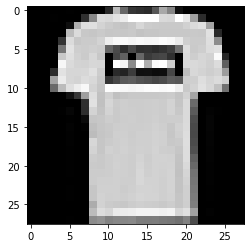

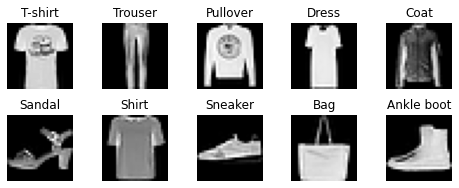

In [11]:
dset.plot_data()

### Bayes opt + Batch increasing

In [12]:
fit_with_partial = partial(increase_batch_size_train, dset, EPOCHS, True)
optimizer = BayesianOptimization(
    f=fit_with_partial,
    pbounds=hparams,
    verbose=2,
    random_state=1,
)

In [ ]:
optimizer.maximize(init_points=10, n_iter=10)
results = optimizer.max["params"]

In [ ]:
test_acc, h, y_test_pred = increase_batch_size_train(dset, EPOCHS, bayes=False, **results)
test_accuracy_dict["bayes_batch_nopr"] = test_acc
histrory_dict["bayes_batch_nopr"] = h

if test_acc > best_test_acc:
    best_test_acc = test_acc
    best_y_test_pred = y_test_pred
    best_y_test = dset.y_test

0.9416000247001648


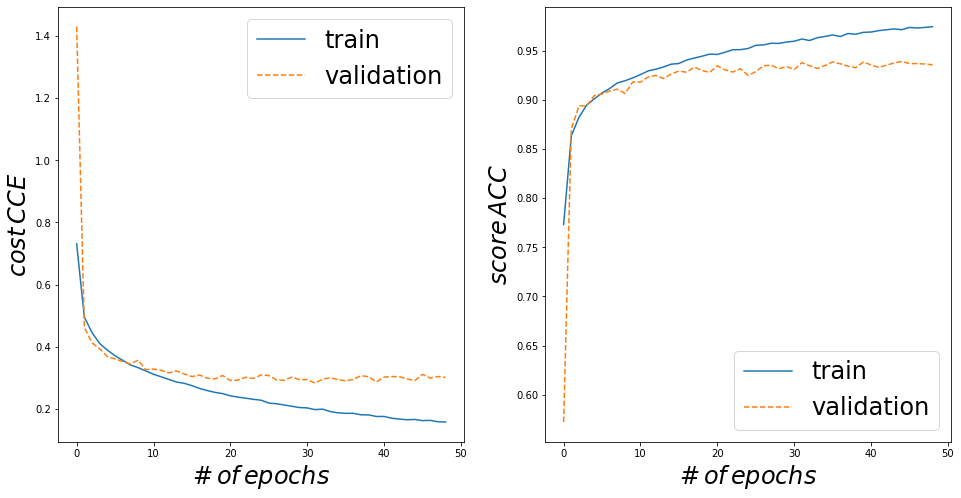

In [23]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(h['loss'], '-', label='train', markersize=12)
plt.plot(h['val_loss'], '--', label='validation', markersize=12)
plt.xlabel(r'$\# \, of \, epochs$', fontsize=24)
plt.ylabel(r'$cost \, CCE$', fontsize=24)
plt.legend(fontsize=24)
plt.subplot(1,2,2)
plt.plot(h['acc'], '-', label='train', markersize=12)
plt.plot(h['val_acc'], '--', label='validation', markersize=12)
plt.xlabel(r'$\# \, of \, epochs$', fontsize=24)
plt.ylabel(r'$score \, ACC$', fontsize=24)
plt.legend(fontsize=24)
plt.savefig('./cost-score.svg', format='svg')
print(test_acc)